<h2>Import packeges

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

<h2>Load data from csv and read

In [2]:
fish_data = pd.read_csv("fish_market.csv")

In [3]:
fish_data.head()

,Unnamed: 0,Species,Weight,Length1,Length2,Length3,Height,Width,Female
0,0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1
2,2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1


In [4]:
fish_data.tail()

,Unnamed: 0,Species,Weight,Length1,Length2,Length3,Height,Width,Female
171,173,Parkki,120.2,110.5,12.2,130.04,2.0904,12.3936,1
172,174,Smelt,13.4,11.7,12.4,13.50,2.4300,1.2690,0
173,175,Perch,1200.2,12.1,13.0,13.80,2.2770,1.2558,1
174,176,Smelt,19.7,13.2,14.3,15.20,2.8728,2.0672,0
175,177,Whitefish,19.9,13.8,15.0,16.20,2.9322,1.8792,0


In [5]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  176 non-null    int64  
 1   Species     176 non-null    object 
 2   Weight      176 non-null    float64
 3   Length1     176 non-null    float64
 4   Length2     176 non-null    float64
 5   Length3     176 non-null    float64
 6   Height      176 non-null    float64
 7   Width       176 non-null    float64
 8   Female      176 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 11.8+ KB


In [6]:
fish_data.drop('Unnamed: 0', axis=1, inplace=True)
fish_data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Female'],
      dtype='object')

<h2>Encoding

In [7]:
fish_data.Species = fish_data.Species.str.strip()

In [8]:
fish_data.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [9]:
LabelEncoder_ = preprocessing.LabelEncoder()

In [10]:
fish_data.Species = LabelEncoder_.fit_transform(fish_data.Species)

In [11]:
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Female
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056,1
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340,1


<h2>Divide data into Train and Test Sets

In [12]:
features = fish_data[['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
target = fish_data.Female

In [13]:
features.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [28]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=17)

In [15]:
x_train.shape, y_train.shape

((140, 7), (140,))

In [16]:
x_test.shape, y_test.shape

((36, 7), (36,))

<h2>Train model

In [29]:
model = tree.DecisionTreeClassifier()

In [30]:
clf = model.fit(x_train, y_train)

<h2>Test model

In [31]:
y_predicted = clf.predict(x_test)

In [32]:
print("Accuracy of the model:", metrics.accuracy_score(y_test, y_predicted))

Accuracy of the model: 0.75


<h2>My work

In [21]:
feature_cols = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

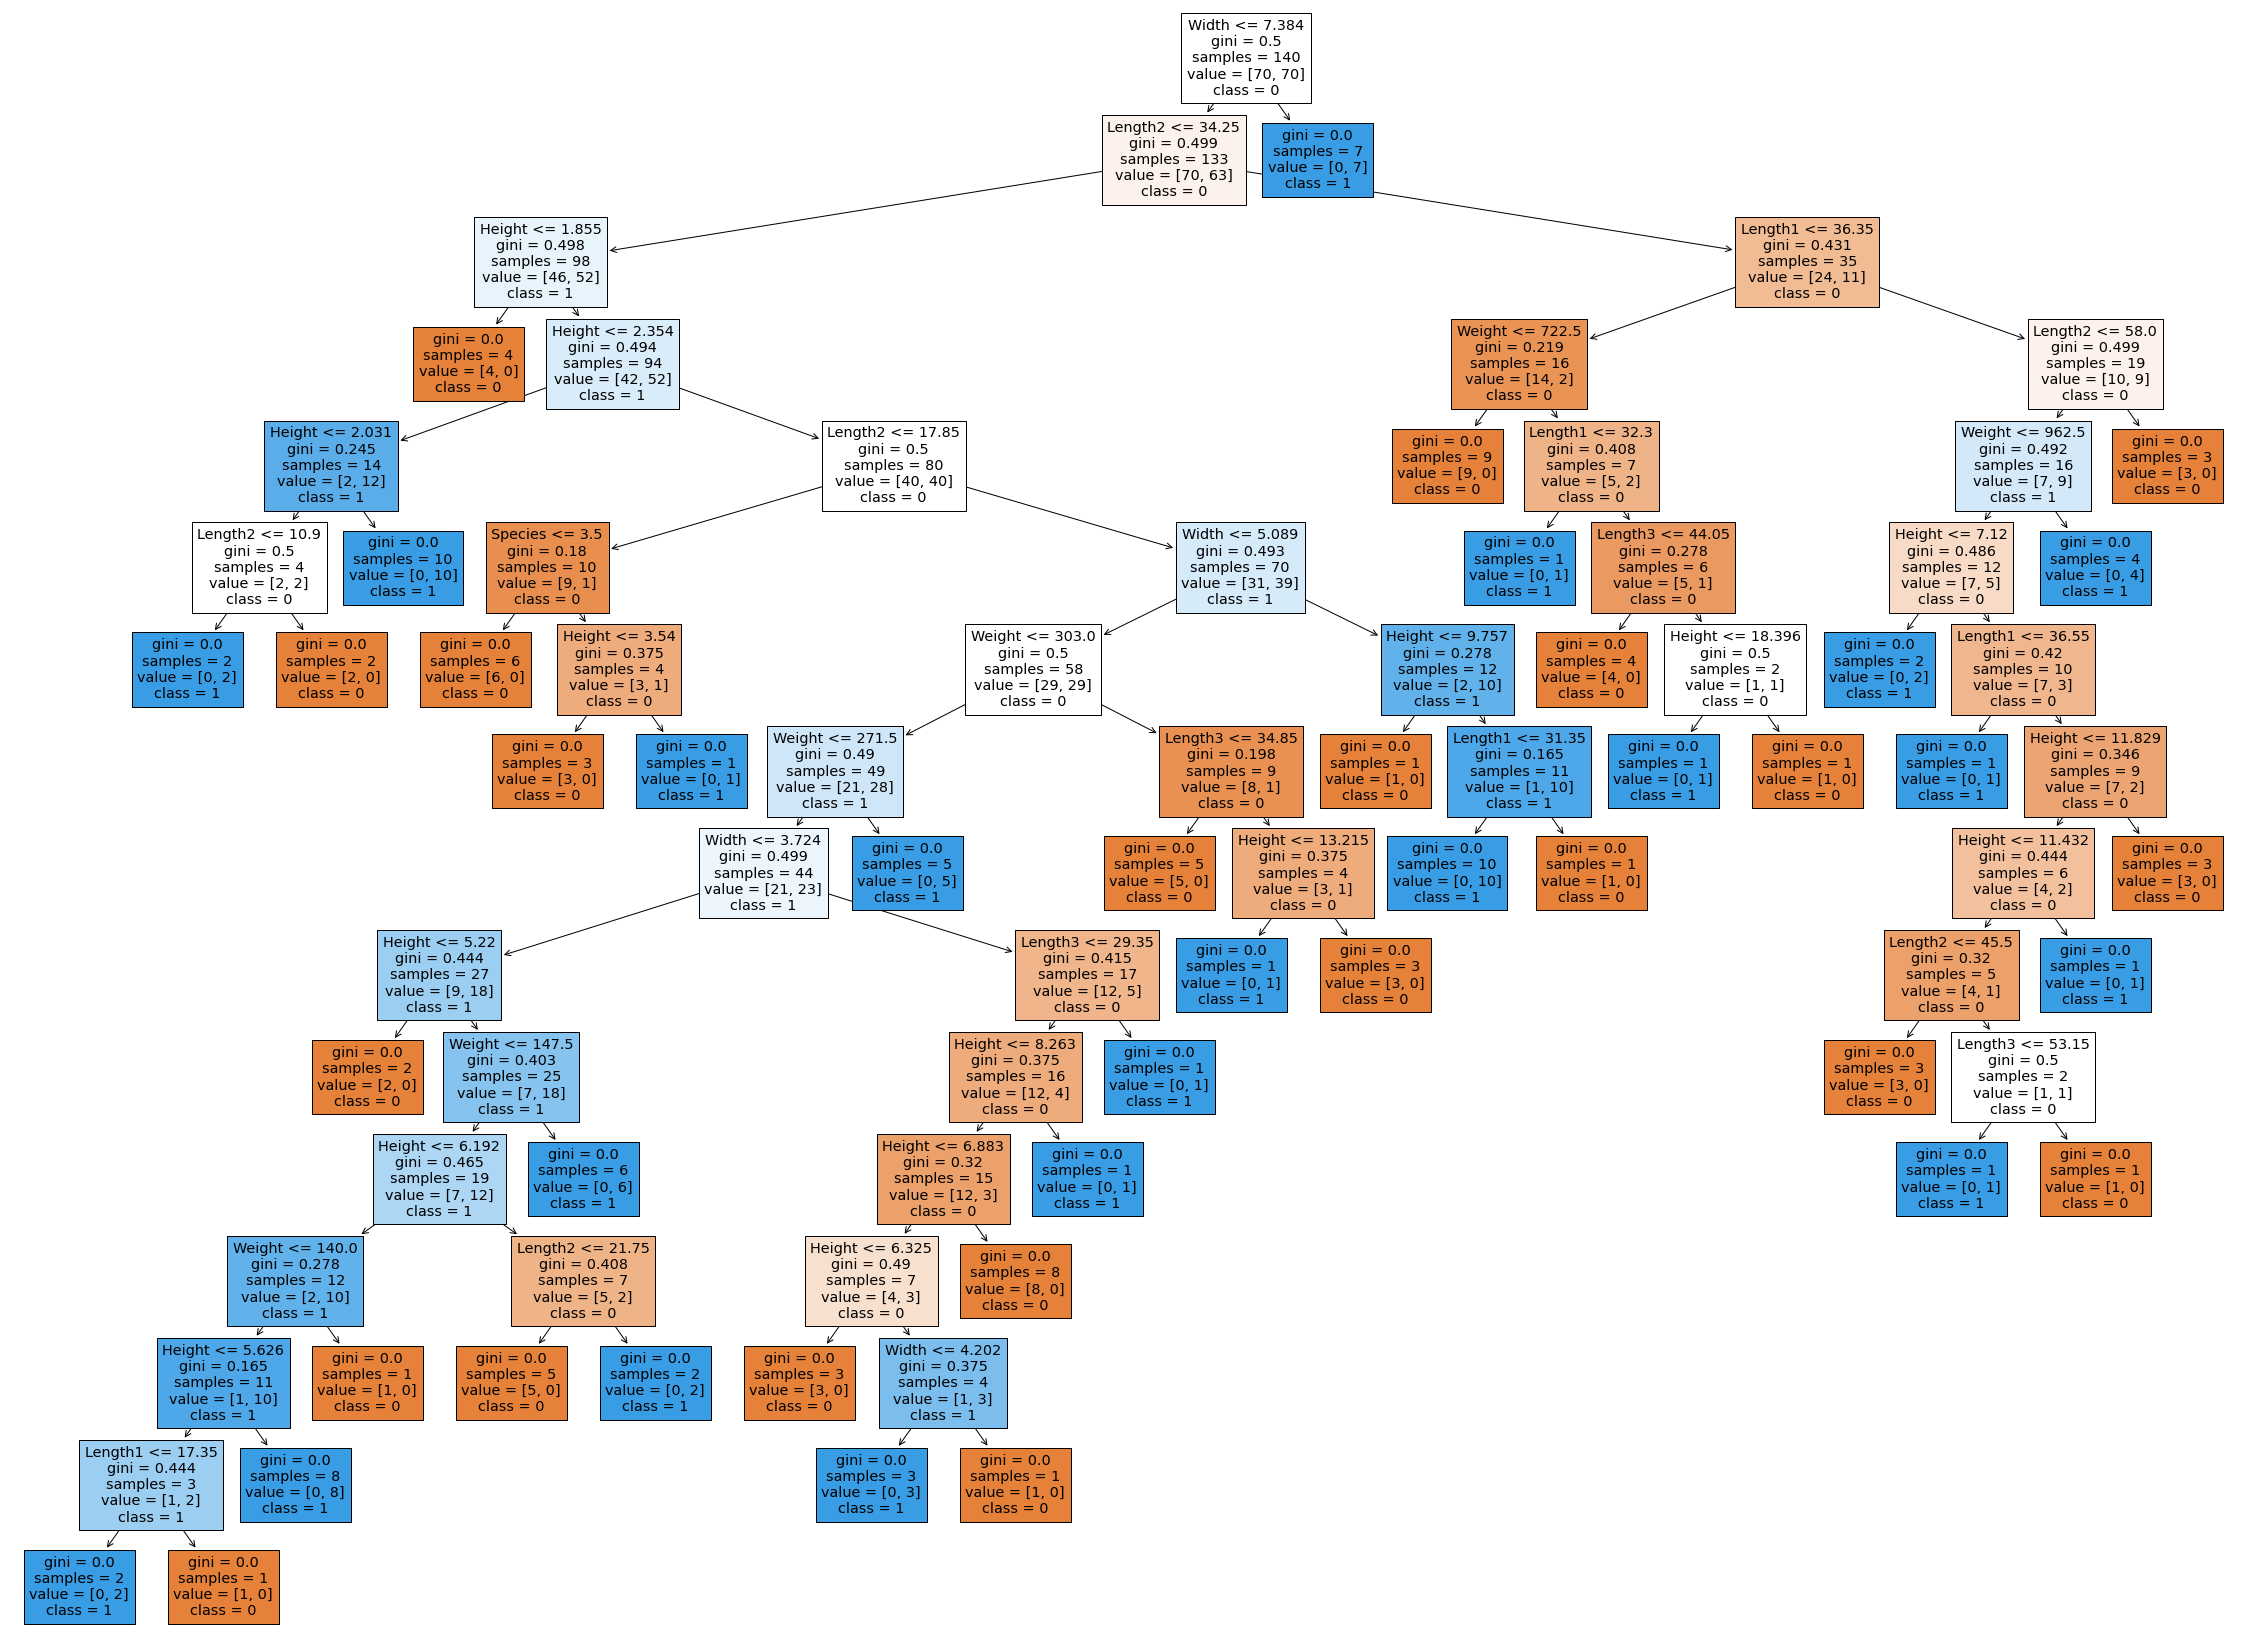

In [23]:
fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(model,
                   feature_names=features.columns,
                   class_names=target.astype(str),
                   filled=True)

-------------------

<h3>Criterion, I choice because our dataset didn't has many data for entropy criterion

In [33]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=17)

In [34]:
model = tree.DecisionTreeClassifier(criterion='entropy')
clf = model.fit(x_train, y_train)
y_predicted = clf.predict(x_test)

In [35]:
print("Accuracy of the model:", metrics.accuracy_score(y_test, y_predicted))

Accuracy of the model: 0.6388888888888888


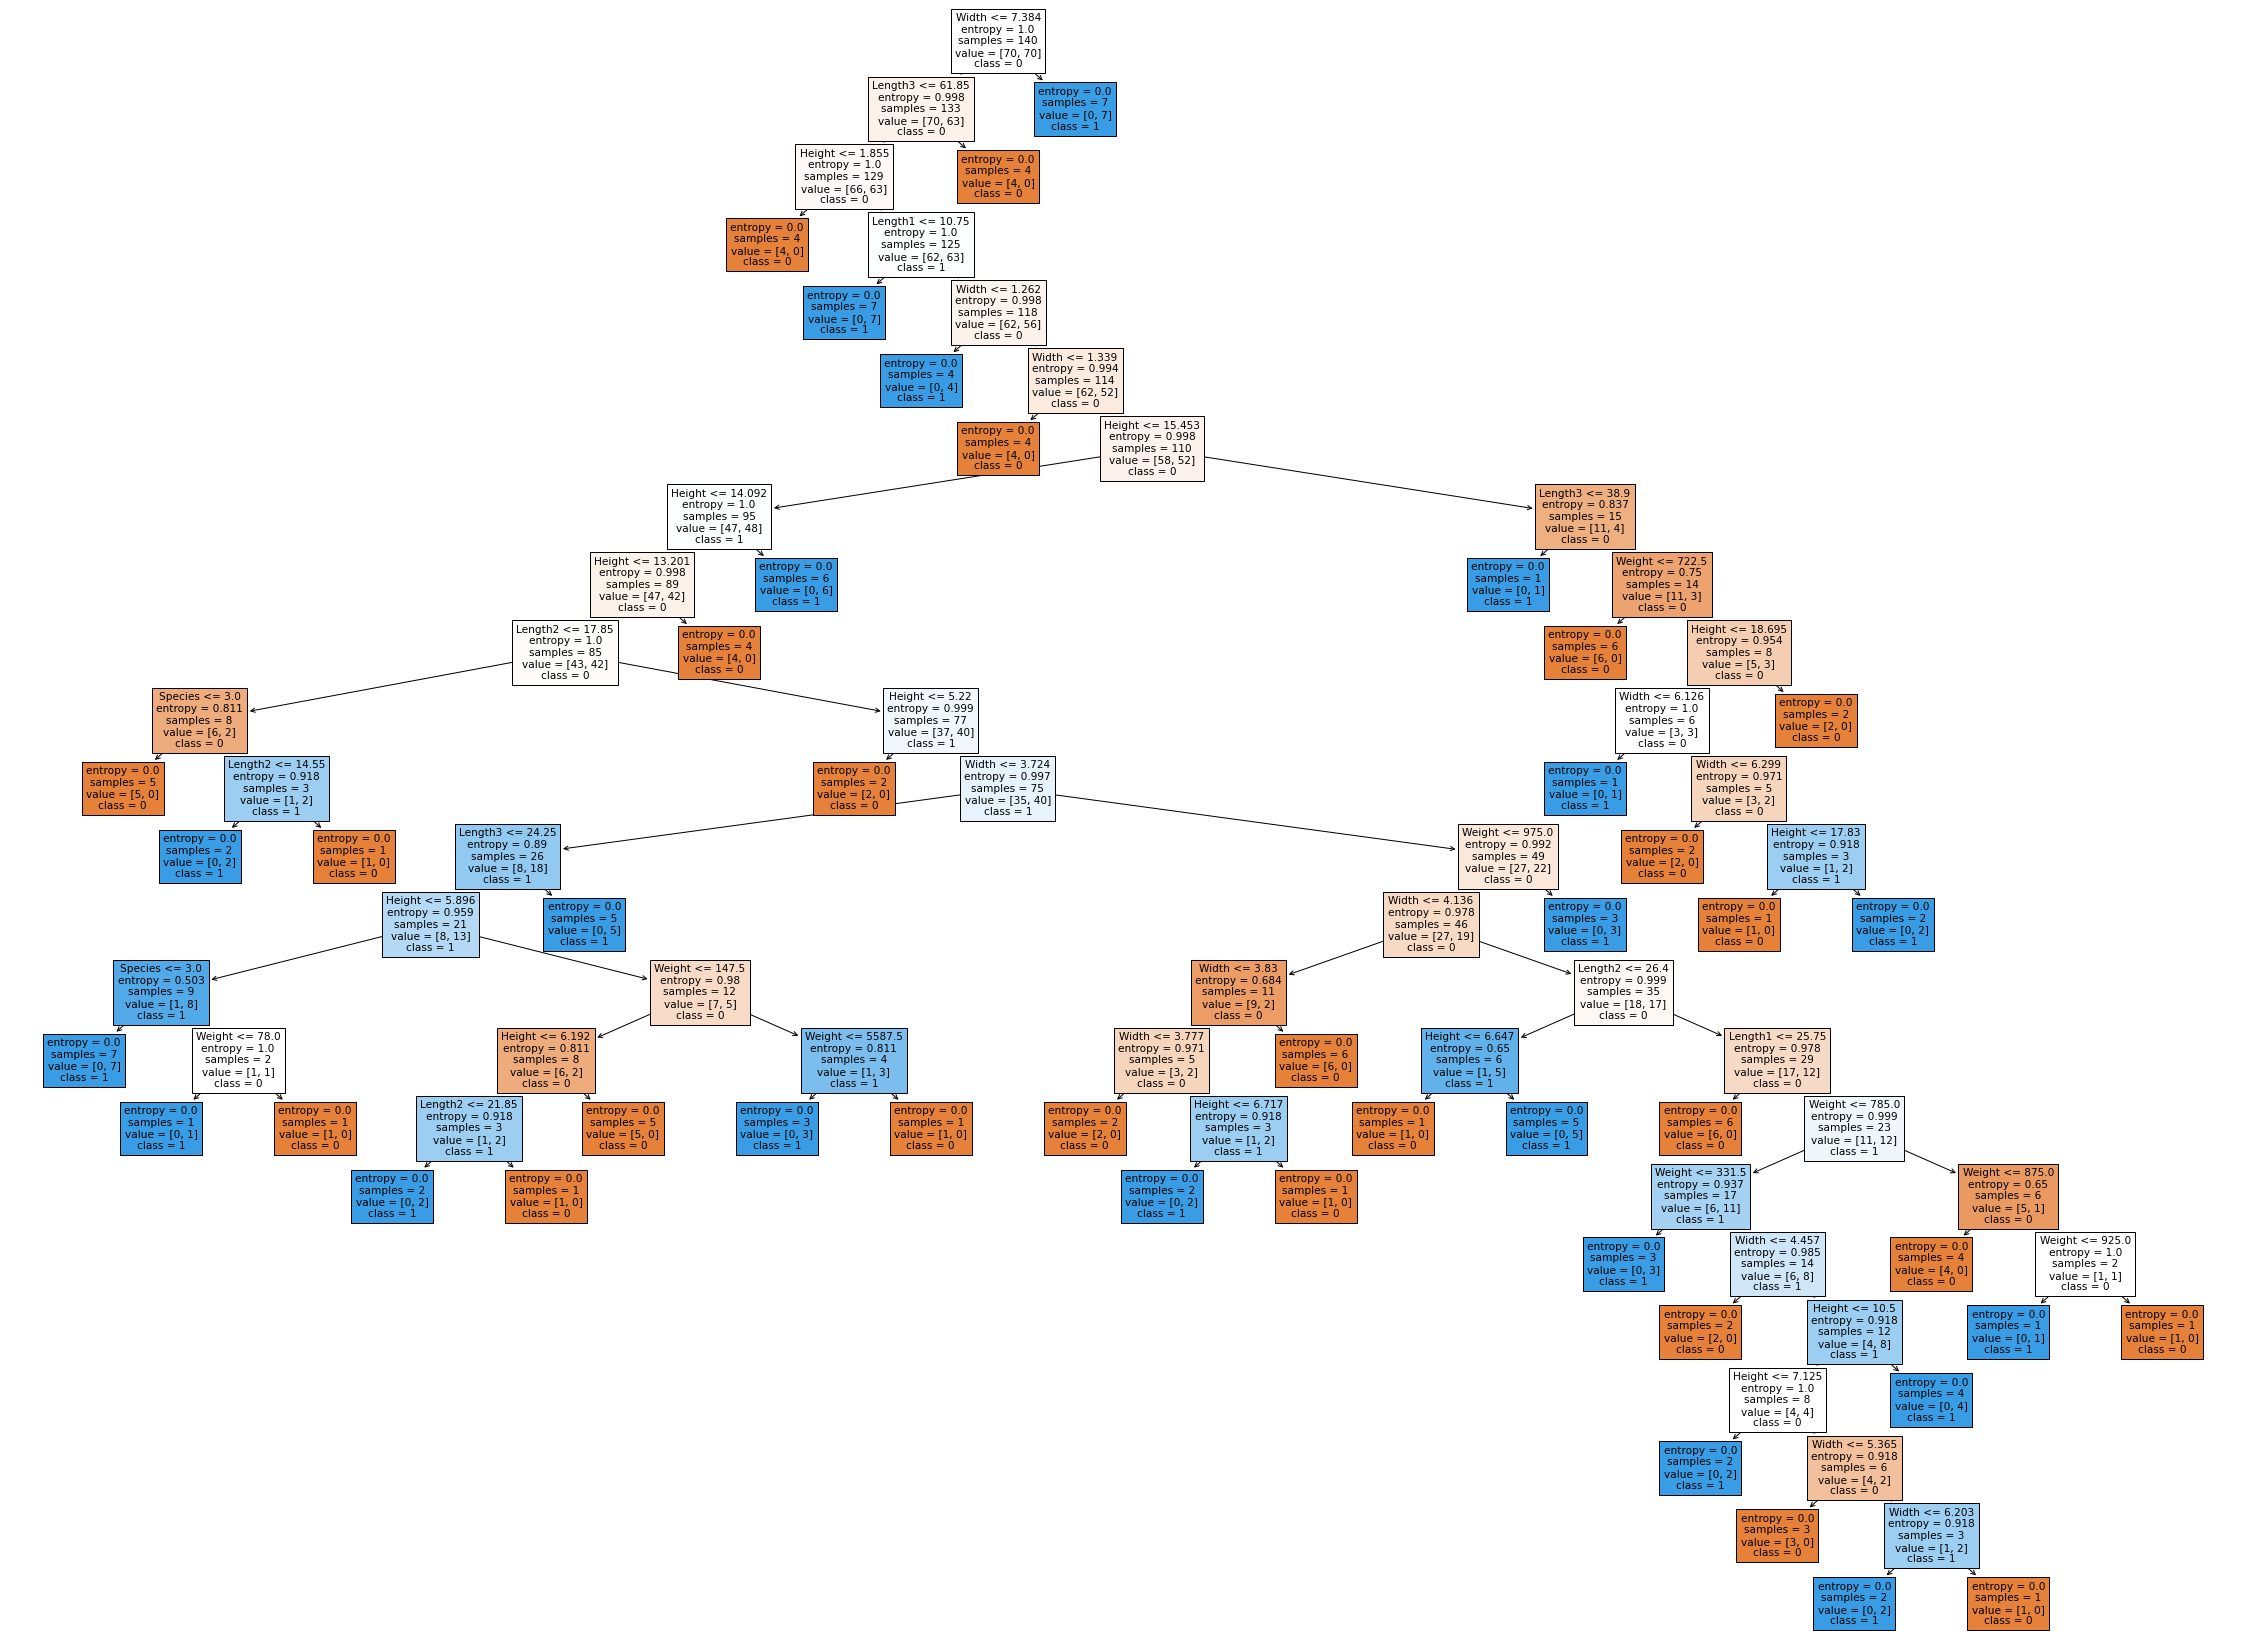

In [27]:
fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(model,
                   feature_names=features.columns,
                   class_names=target.astype(str),
                   filled=True)

----------

<h3>Max_depth, our dataset, found extra branches which unusable 

In [121]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=17)

In [122]:
model = tree.DecisionTreeClassifier(max_depth=13)
clf = model.fit(x_train, y_train)
y_predicted = clf.predict(x_test)

In [123]:
print("Accuracy of the model:", metrics.accuracy_score(y_test, y_predicted))

Accuracy of the model: 0.7777777777777778


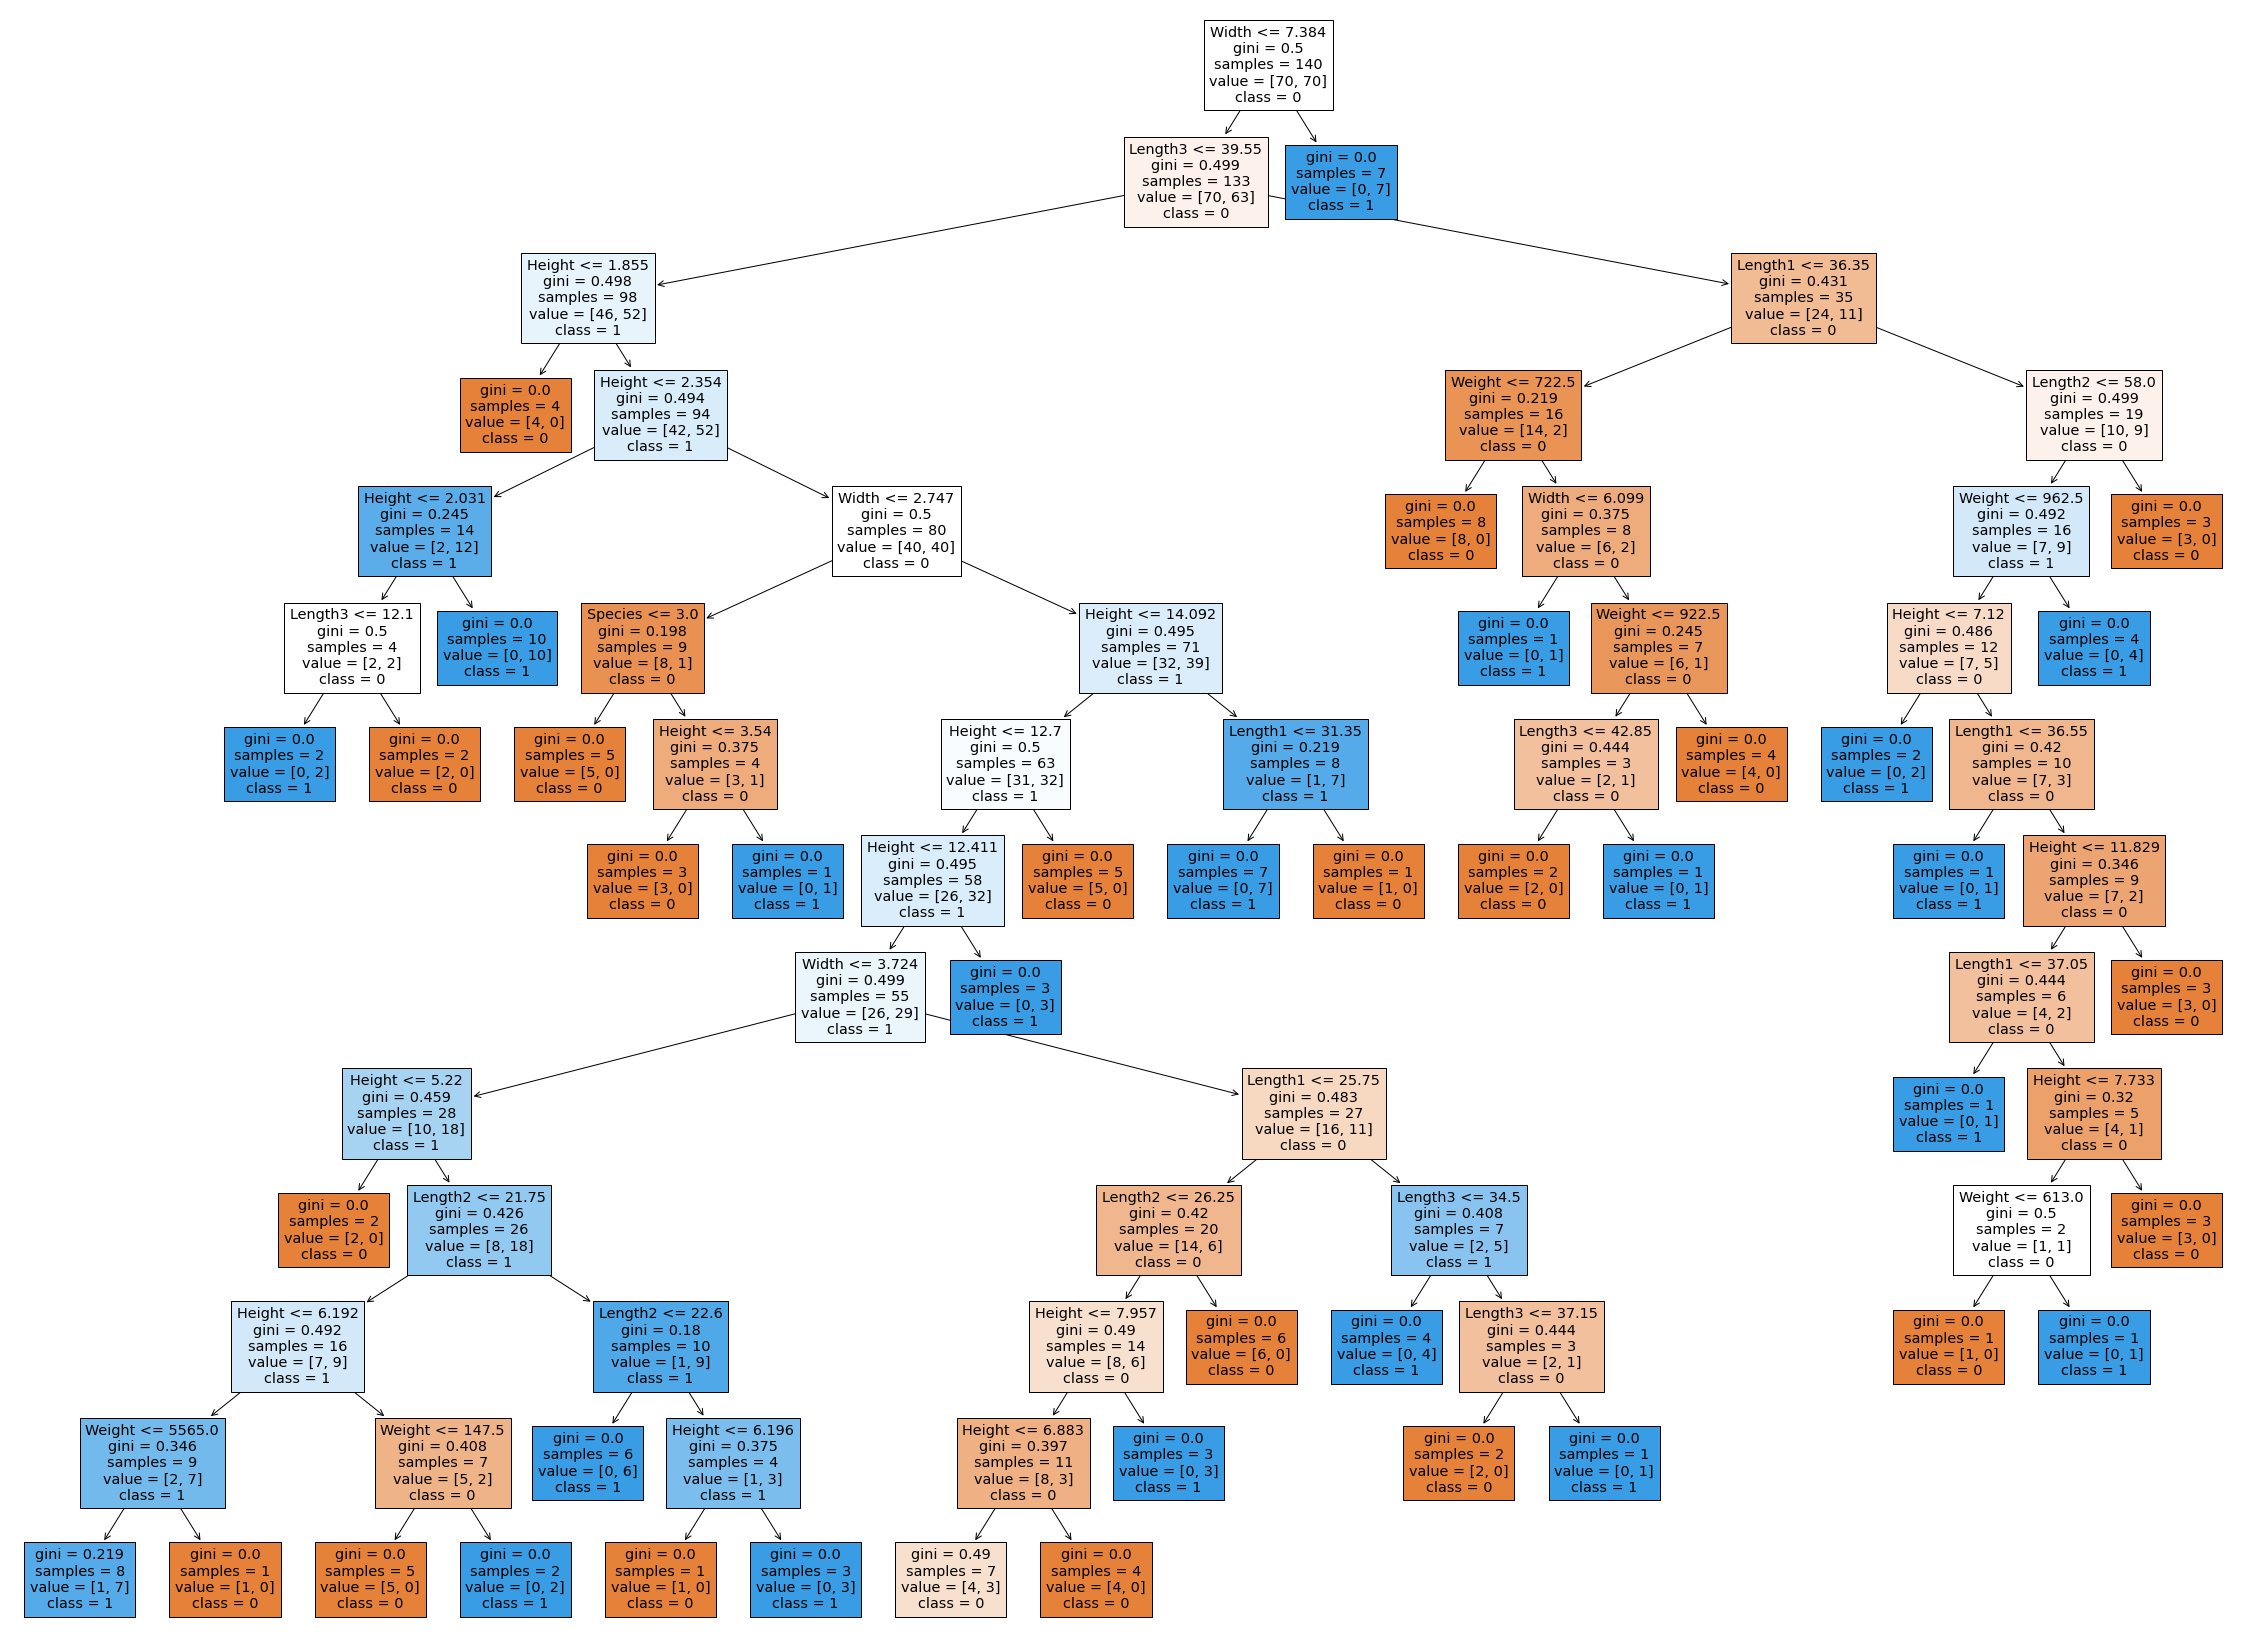

In [124]:
fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(model,
                   feature_names=features.columns,
                   class_names=target.astype(str),
                   filled=True)

----

<h3>Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. Too high values can also lead to under-fitting hence depending on the level of underfitting or overfitting. I want find min samples but by experement i agree with default parametr

In [174]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=17)

In [175]:
model = tree.DecisionTreeClassifier(max_depth=13, min_samples_split=2)
clf = model.fit(x_train, y_train)
y_predicted = clf.predict(x_test)

In [176]:
print("Accuracy of the model:", metrics.accuracy_score(y_test, y_predicted))

Accuracy of the model: 0.7777777777777778


-----------------

<h3>Since in our model some branches had 1 division, I thought to increase them by at least 2, which had a bad effect on my model, since some data that we need for accuracy is lost. 

In [214]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=17)

In [215]:
model = tree.DecisionTreeClassifier(max_depth=13, min_samples_leaf=1)
clf = model.fit(x_train, y_train)
y_predicted = clf.predict(x_test)

In [216]:
print("Accuracy of the model:", metrics.accuracy_score(y_test, y_predicted))

Accuracy of the model: 0.7777777777777778


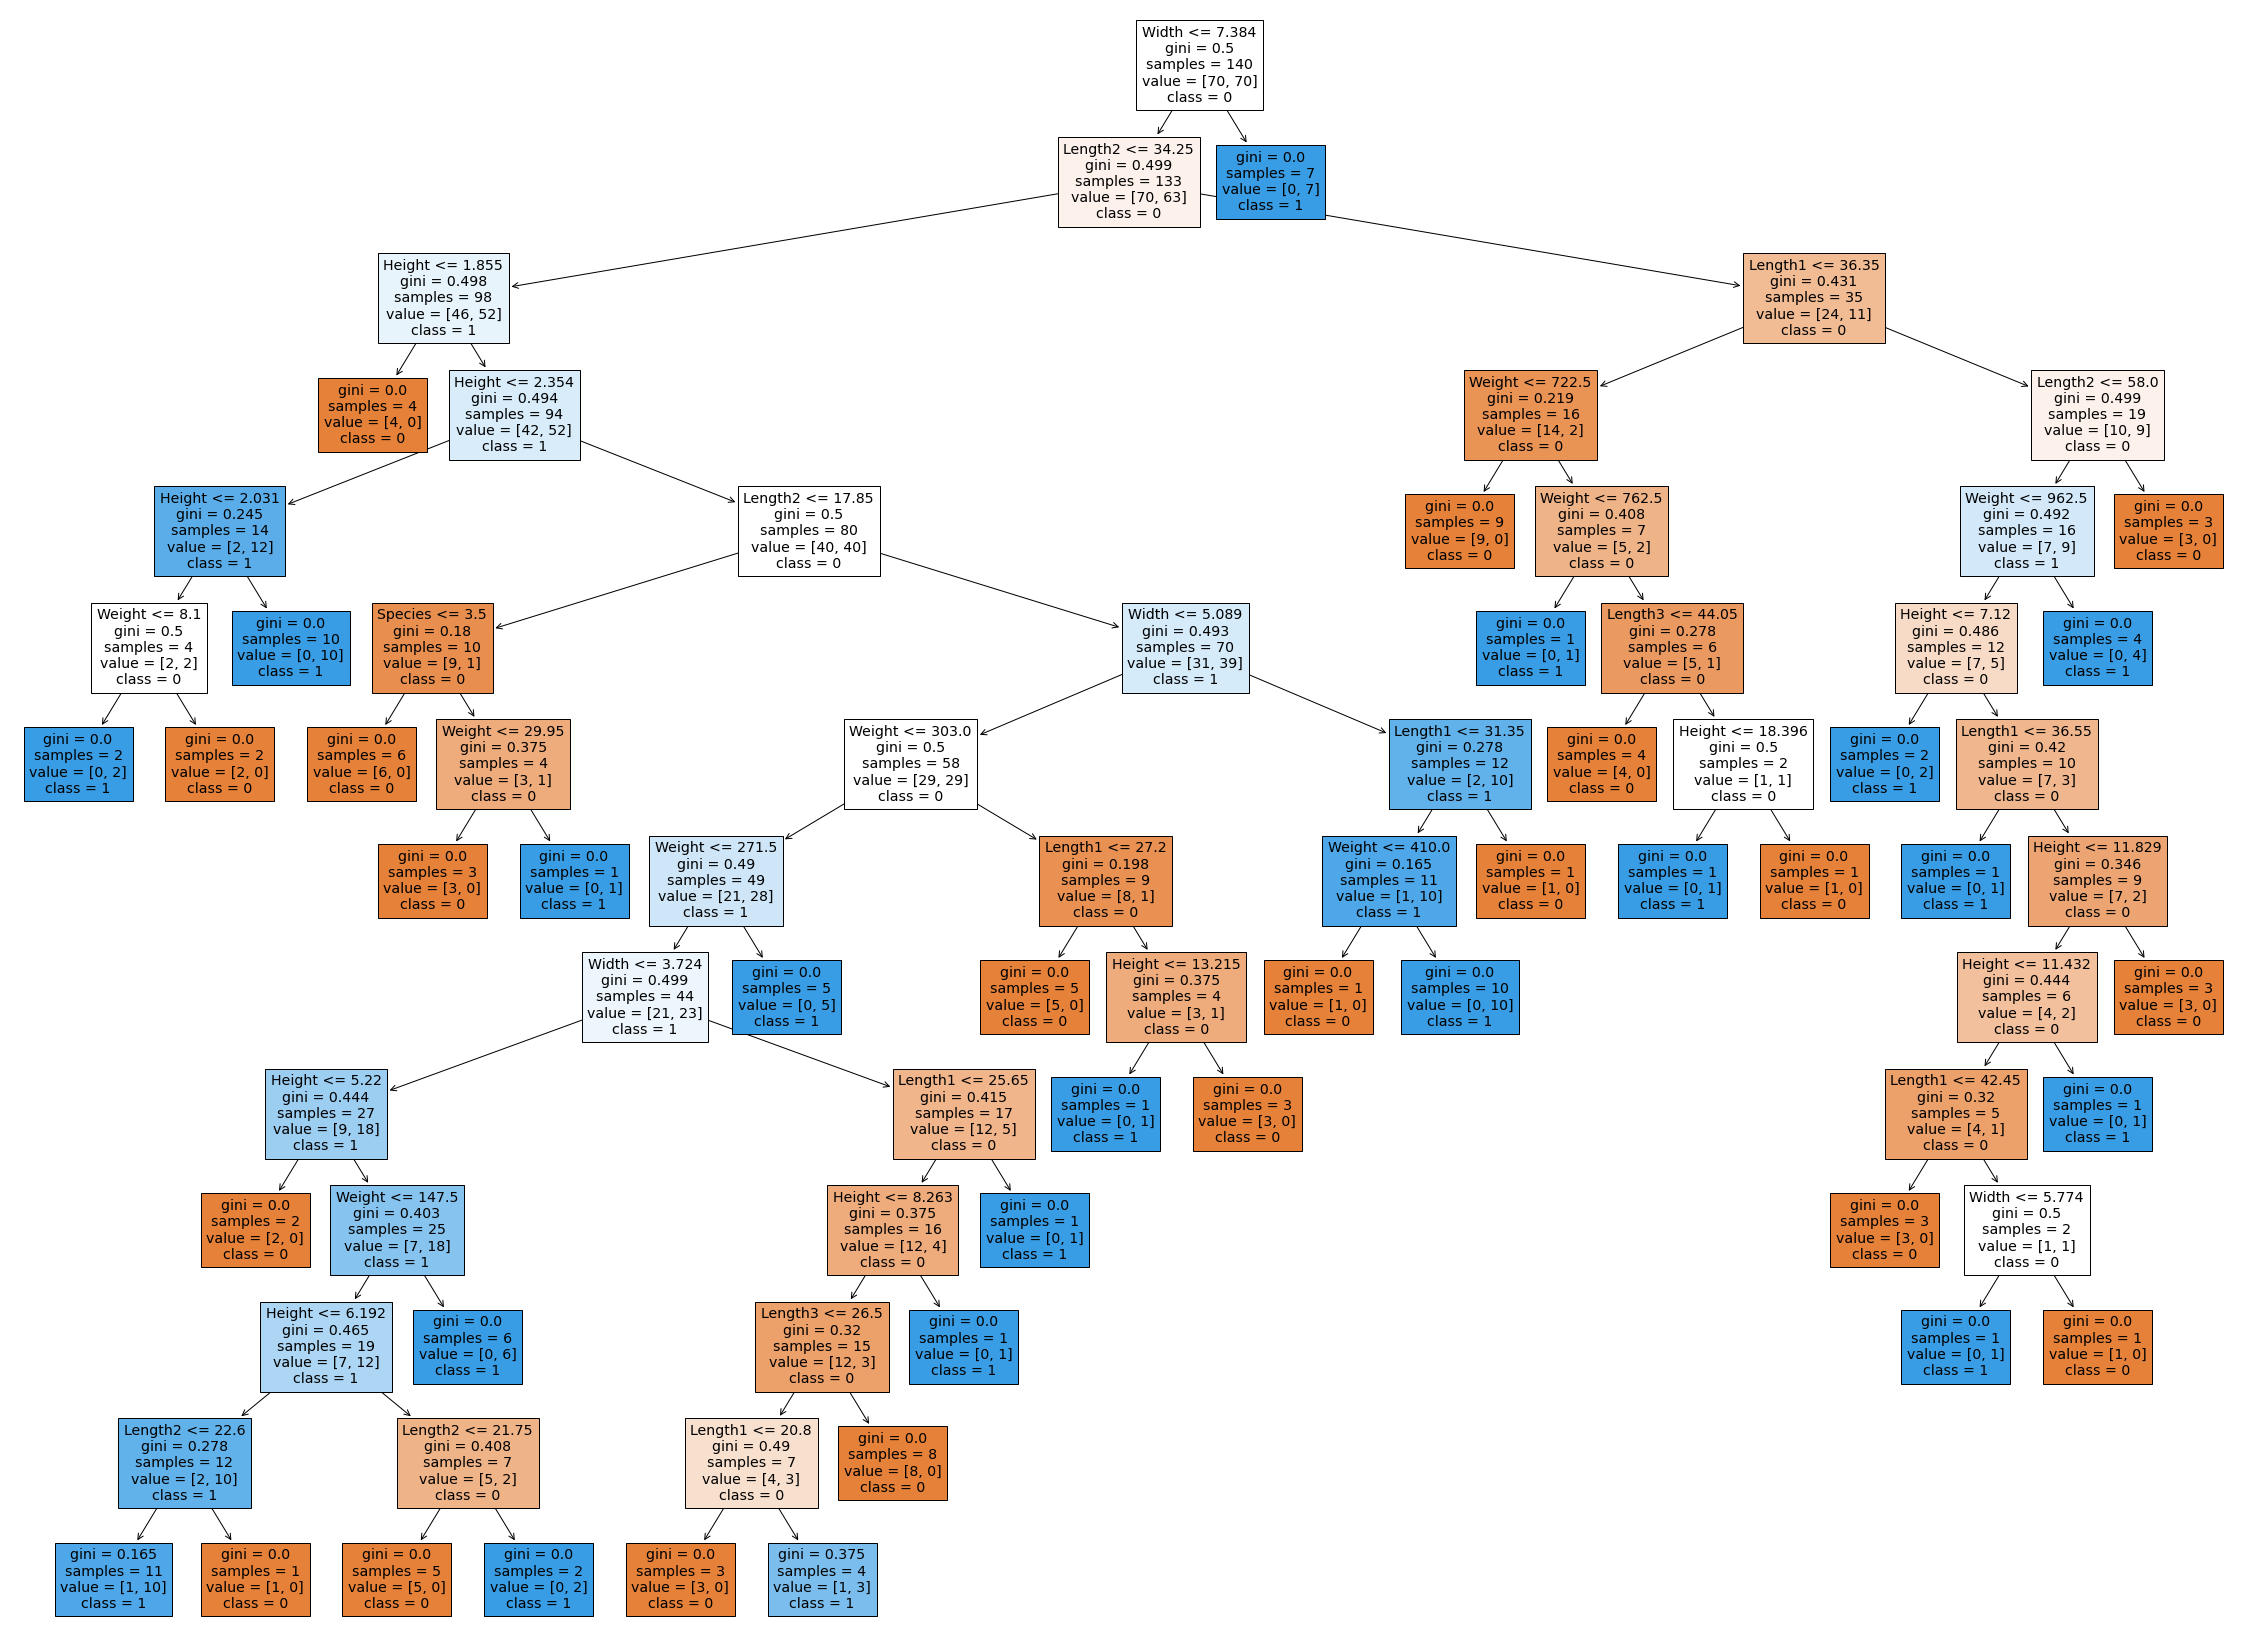

In [217]:
fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(model,
                   feature_names=features.columns,
                   class_names=target.astype(str),
                   filled=True)

----------------------

<h3>Weighing the sample, I wanted to get a balanced sample, but it did not work out, the data is lost when weighing and the accuracy is lost at the same time 

In [292]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=17)

In [293]:
model = tree.DecisionTreeClassifier(max_depth=13, min_weight_fraction_leaf=0)
clf = model.fit(x_train, y_train)
y_predicted = clf.predict(x_test)

In [294]:
print("Accuracy of the model:", metrics.accuracy_score(y_test, y_predicted))

Accuracy of the model: 0.7777777777777778


----------------------

<h3>Considering the features used, I considered leaving all 7, since I realized that when calculating each one participates in training, I decided to check it as it happens and it happens that some do not participate and just waste time, while I noticed that when there was a maximum length of 13 that at the end each branch had 1 branch and deleted which was good for our model 

In [364]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=17)

In [365]:
model = tree.DecisionTreeClassifier(max_depth=12, max_features=7)
clf = model.fit(x_train, y_train)
y_predicted = clf.predict(x_test)

In [366]:
print("Accuracy of the model:", metrics.accuracy_score(y_test, y_predicted))

Accuracy of the model: 0.8055555555555556


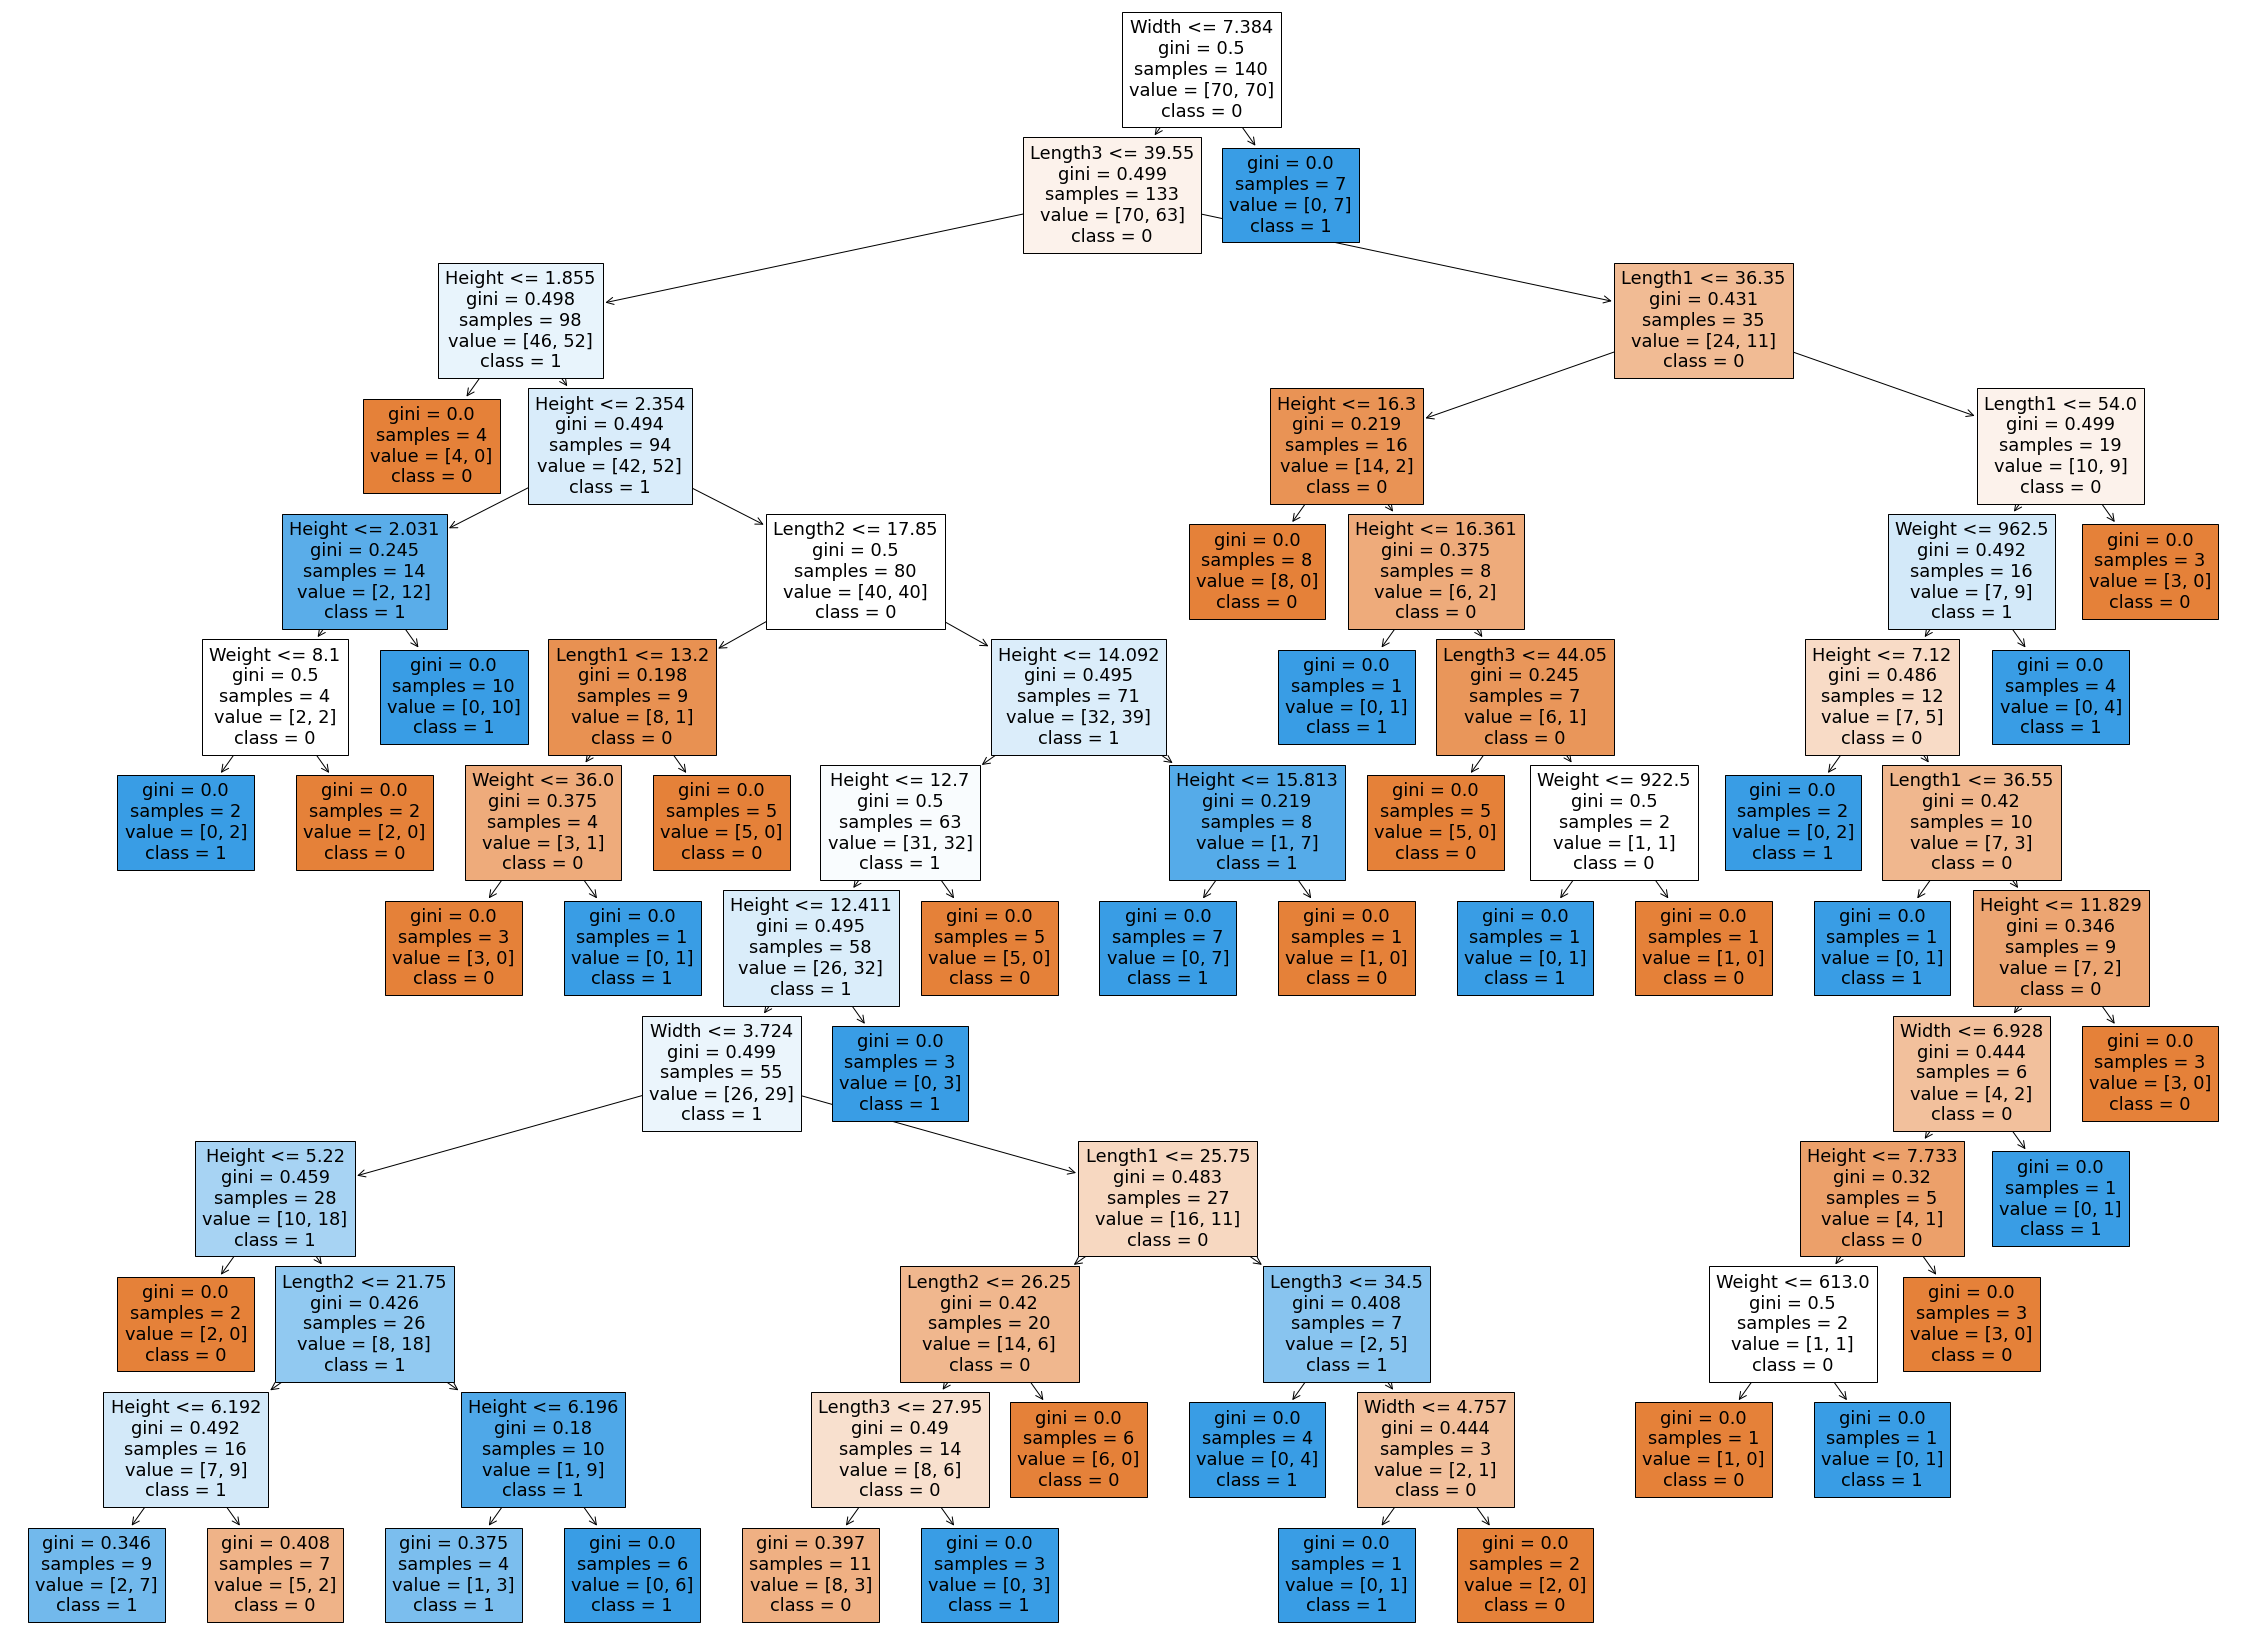

In [367]:
fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(model,
                   feature_names=features.columns,
                   class_names=target.astype(str),
                   filled=True)

-------------------

<h3>Having set up a balanced weight, this means that by choosing a certain sample, it will not affect it, but will affect the weight, which we can change, and I decided to just balance it, which gave a good result. 

In [368]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=17)

In [372]:
model = tree.DecisionTreeClassifier(max_depth=12, max_features=7, class_weight='balanced')
clf = model.fit(x_train, y_train)
y_predicted = clf.predict(x_test)

In [373]:
print("Accuracy of the model:", metrics.accuracy_score(y_test, y_predicted))

Accuracy of the model: 0.8333333333333334


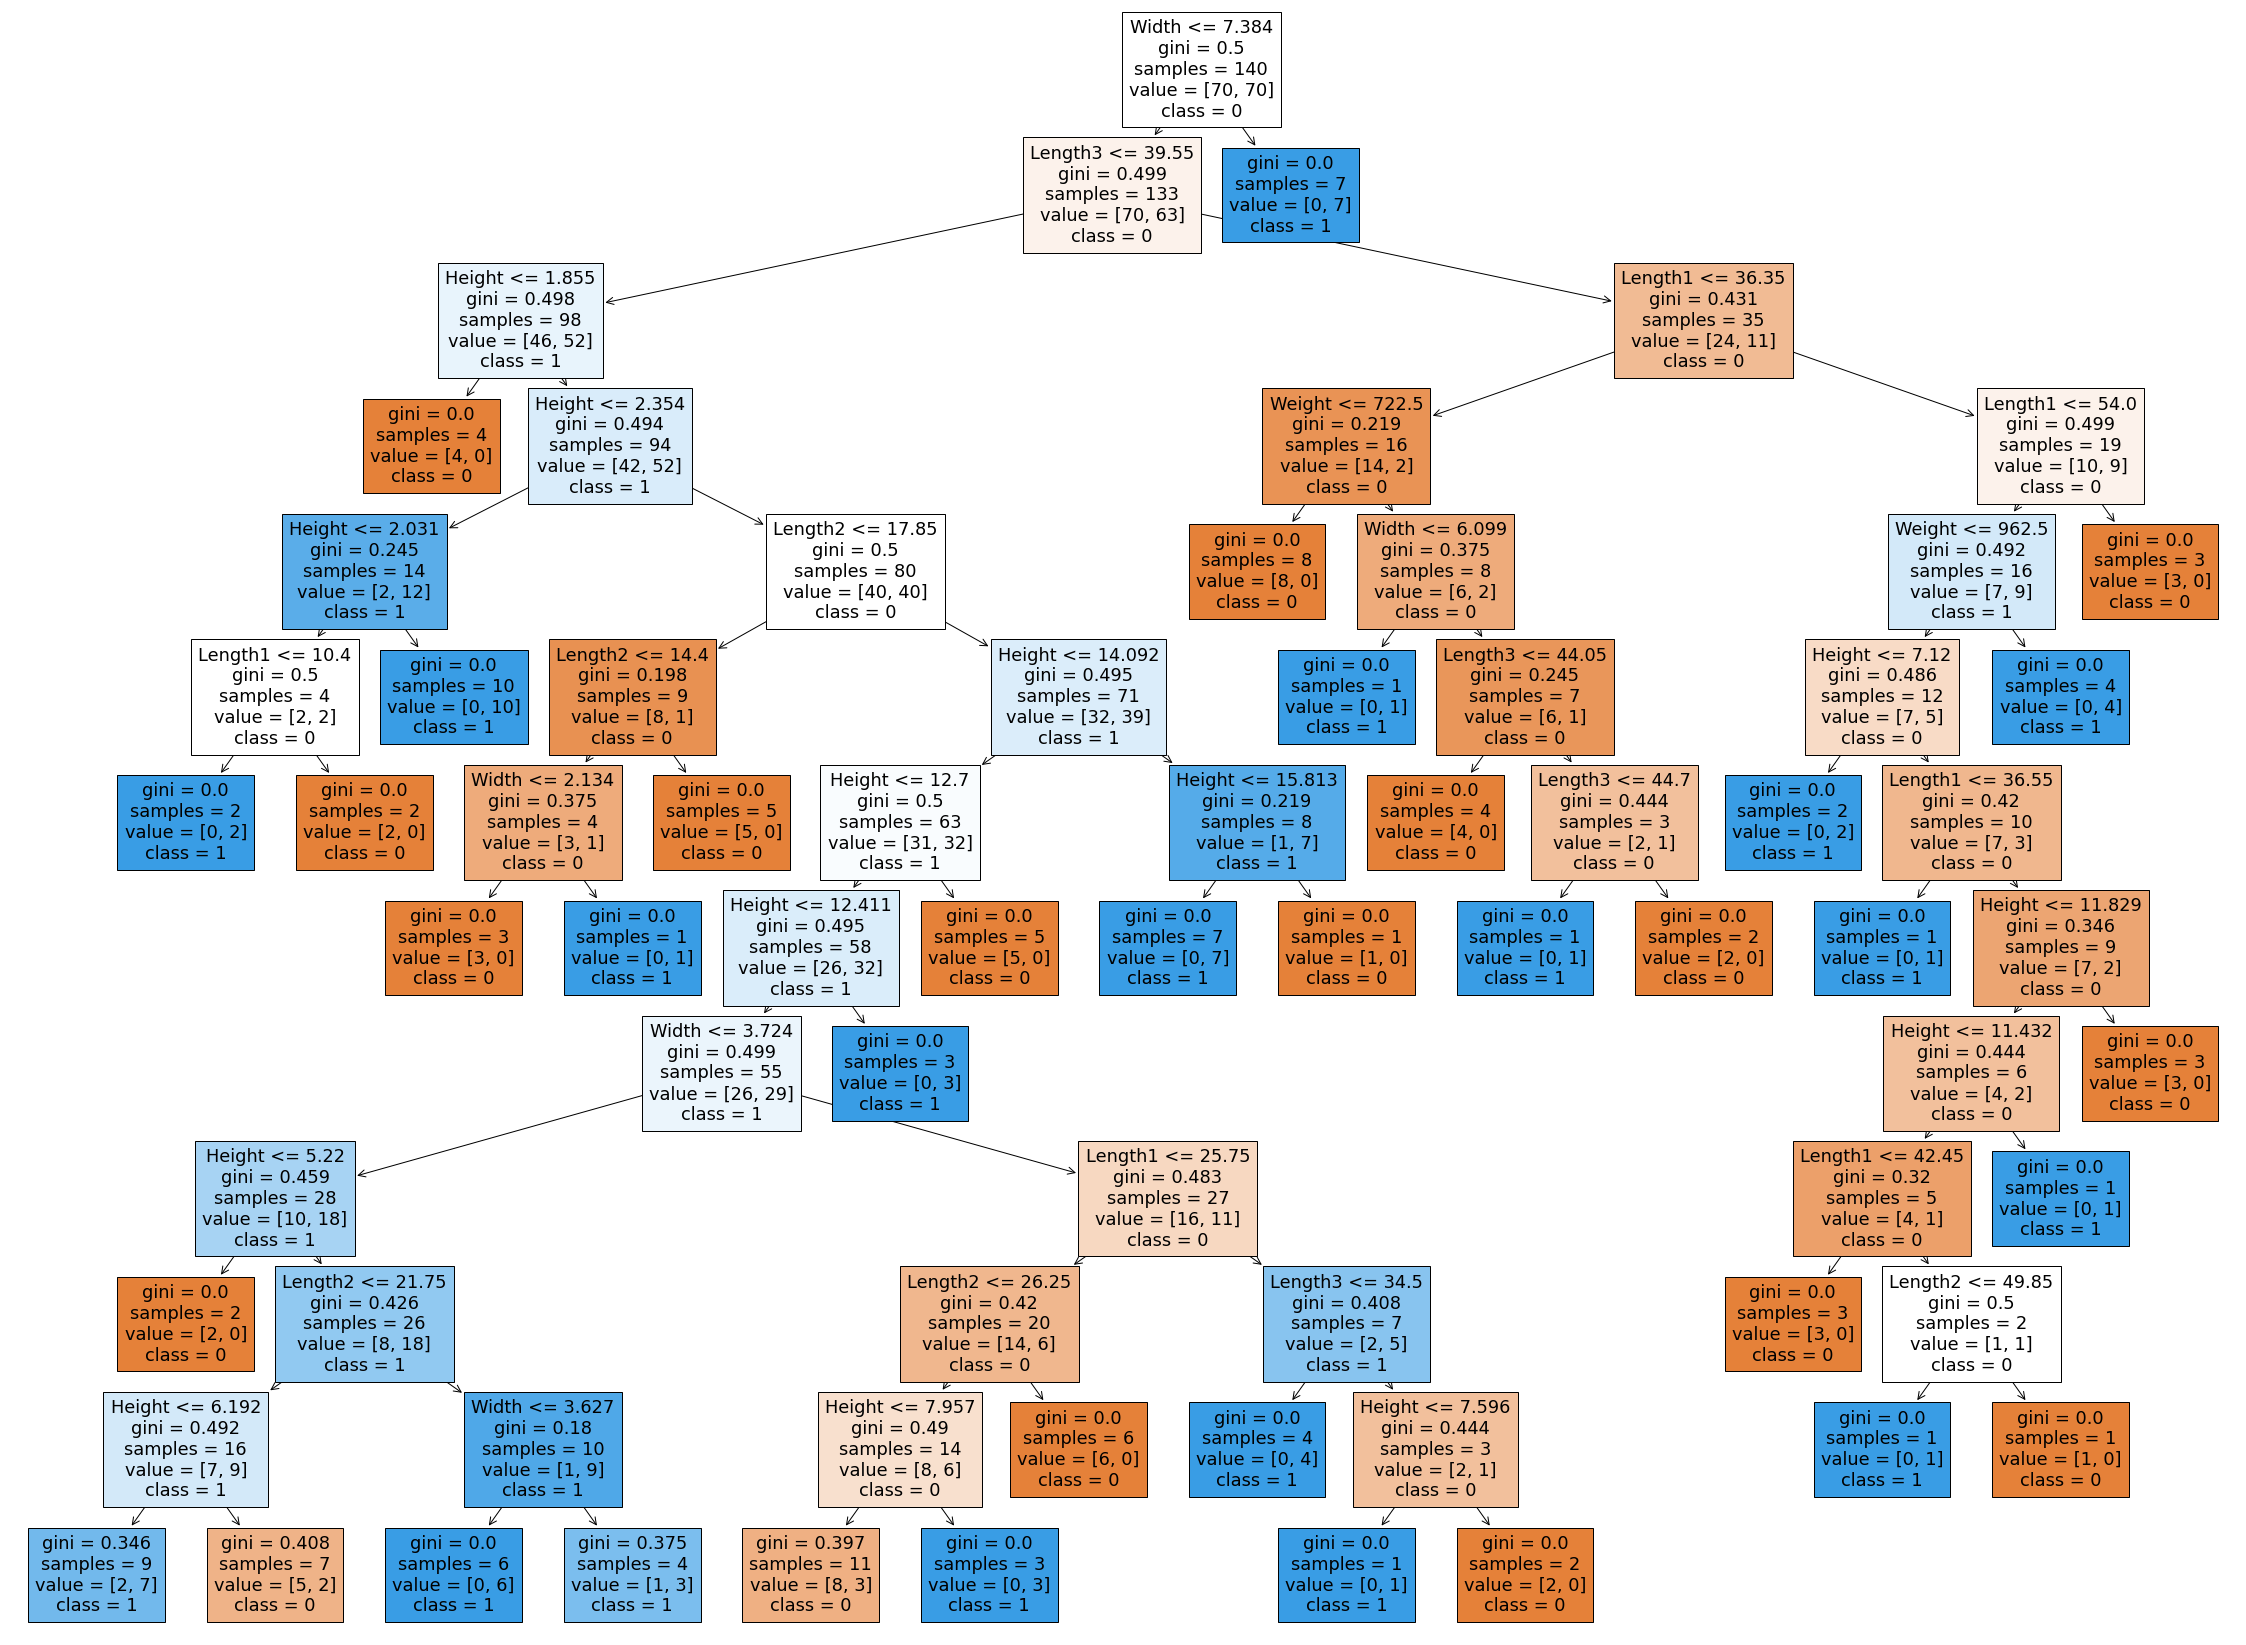

In [374]:
fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(model,
                   feature_names=features.columns,
                   class_names=target.astype(str),
                   filled=True)

<h2>Summary

In this work, we studied what a decision tree is, how to build it, and based on what data. We remembered what the target value is and how to determine it. We then used the training and testing functions of our samples, and as a result, their accuracy was verified. Each parameter in the decision tree affects a specific part of the tree and gives either good or bad results. I roughly understood how machine learning works in this regard, for example, a tree how we can improve it so that our data learns itself 